## Lab 03
### PRAMOD KUNJUKUNJU SAJI - 8856432

##### We are trying to find the relation between 'bmi body mass index' and 'a quantitative measure of disease progression one year after baseline'

In [172]:
# Importing the libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [173]:
# Get the dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [174]:
diabetes_X = pd.DataFrame(diabetes_X)
diabetes_X.columns = ["age", "sex", "bmi", "abp", "s1_tc", "s2_ldl", "s3_hdl","s4_tch","s5_ltg","s6_glu"]
diabetes_X

,age,sex,bmi,abp,s1_tc,s2_ldl,s3_hdl,s4_tch,s5_ltg,s6_glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [175]:
diabetes_y = pd.DataFrame(diabetes_y)
diabetes_y.columns = ["dis_prog"]
diabetes_y

,dis_prog
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [176]:
diabetes = pd.concat([diabetes_X, diabetes_y], axis=1, join='inner')
diabetes

,age,sex,bmi,abp,s1_tc,s2_ldl,s3_hdl,s4_tch,s5_ltg,s6_glu,dis_prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


<Axes: xlabel='bmi', ylabel='dis_prog'>

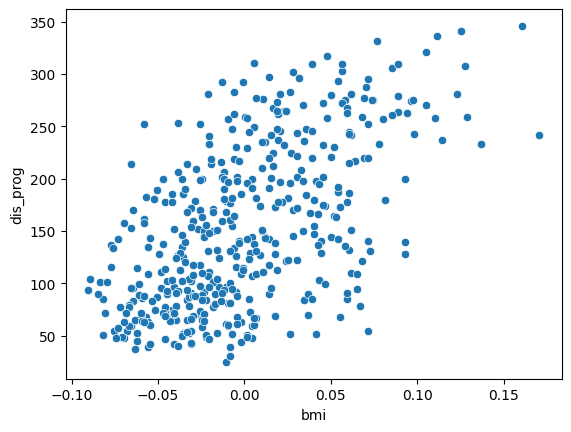

In [177]:
# Plotting bmi against disease progression
sns.scatterplot(data = diabetes, x = "bmi", y = "dis_prog")

In [178]:
# Getting bmi and disease progression data from diabetes dataframe
X = np.array(diabetes["bmi"]).reshape(-1,1)
y = np.array(diabetes["dis_prog"])

In [179]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [180]:
# Train the model
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [181]:
# Make predictions using test data
y_pred = model.predict(X_test)
y_pred

array([255.17426905, 211.79462571, 161.0087018 , 129.26749936,
       196.98206457, 247.76798848, 123.97729895, 174.76322286,
       205.44638522, 198.04010465,  95.41021675, 198.04010465,
       115.5129783 , 107.04865765, 239.30366783, 130.32553944,
        94.35217667, 101.75845724,  70.01725479, 191.69186416,
       180.05342327, 163.12478196, 128.20945928, 209.67854555,
       206.5044253 , 169.47302245, 111.28081797, 108.10669773,
       156.77654147, 177.9373431 , 149.3702609 , 100.70041716,
       141.96398033, 140.90594025, 146.19614066, 172.6471427 ,
       136.67377993, 143.02202042, 153.60242123, 185.34362367,
        88.00393618, 141.96398033, 145.13810058, 148.31222082,
       182.16950343,  92.23609651, 133.49965968, 176.87930302,
       119.74513862, 185.34362367, 130.32553944, 105.99061756,
       170.53106253, 144.0800605 , 194.86598441, 134.55769976,
       182.16950343, 148.31222082, 147.25418074, 164.18282204,
       192.74990424, 175.82126294, 201.2142249 , 131.38

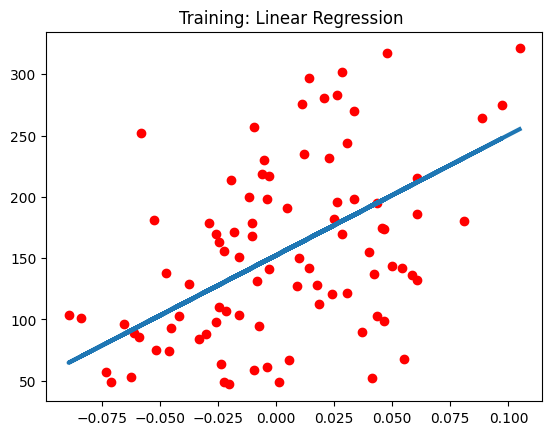

In [182]:
# Plot the line
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, linewidth=3)
plt.title("Training: Linear Regression ")
plt.show()

#### The regression seems like not a good fit for making predictions as the predicted data is all over the plot and not aligned with the model.

In [183]:
print("Coefficients; ",model.coef_)
print("Intercept: ",model.intercept_)   

Coefficients;  [981.65543614]
Intercept:  152.28824927379569


#### Loss functions

In [184]:
# Calculating Mean Absolute Error
mean_absolute_error = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mean_absolute_error)

# Calculating Mean Squared Error
mean_squared_error = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mean_squared_error)

Mean Absolute Error:  52.94370285288119
Mean Squared Error:  4150.6801893299835
